<a href="https://colab.research.google.com/github/realalyeasin/deep_learning/blob/main/pytorch_nn_imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision.transforms import transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

torch.manual_seed(15)

In [ ]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(3 * 256 * 256, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 3 * 256 * 256)
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

In [ ]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
])

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = ImageFolder(root, transform=transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]

In [ ]:
train_dataset = CustomDataset(root='FlowerDataset/train', transform=transform)
valid_dataset = CustomDataset(root='FlowerDataset/valid', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=64, shuffle=True)

In [ ]:
model = NN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

Epoch [1/150], Training Loss:  0.6750, Validation Loss:  0.6469
Epoch [2/150], Training Loss:  0.6205, Validation Loss:  0.6333
Epoch [3/150], Training Loss:  0.5836, Validation Loss:  0.6424
Epoch [4/150], Training Loss:  0.5593, Validation Loss:  0.6256
Epoch [5/150], Training Loss:  0.5349, Validation Loss:  0.6279
Epoch [6/150], Training Loss:  0.5170, Validation Loss:  0.6409
Epoch [7/150], Training Loss:  0.4986, Validation Loss:  0.6231
Epoch [8/150], Training Loss:  0.4826, Validation Loss:  0.6285
Epoch [9/150], Training Loss:  0.4647, Validation Loss:  0.6245
Epoch [10/150], Training Loss:  0.4548, Validation Loss:  0.6276
Epoch [11/150], Training Loss:  0.4425, Validation Loss:  0.6228
Epoch [12/150], Training Loss:  0.4316, Validation Loss:  0.6253
Epoch [13/150], Training Loss:  0.4224, Validation Loss:  0.6381
Epoch [14/150], Training Loss:  0.4157, Validation Loss:  0.6344
Epoch [15/150], Training Loss:  0.4095, Validation Loss:  0.6275
Epoch [16/150], Training Loss:  0.

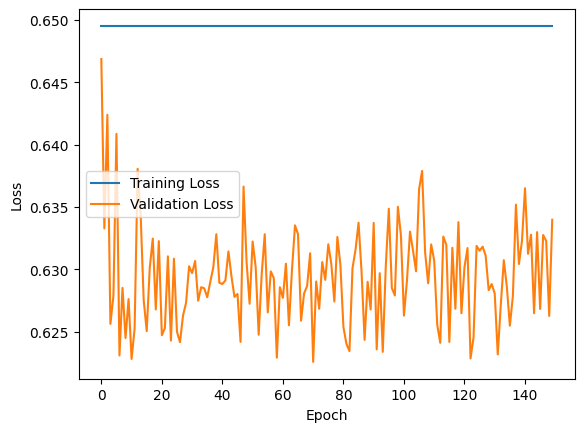

In [ ]:
num_epochs = 150
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    average_training_loss = running_loss / len(train_loader)
    train_losses.append(average_train_loss)

    #VALIDATION
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

    average_valid_loss = valid_loss / len(valid_loader)
    valid_losses.append(average_valid_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {average_training_loss: .4f}, '
          f'Validation Loss: {average_valid_loss: .4f}')

#Evaluate the model
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.4f}')

evaluate_model(model, valid_loader)

plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

torch.save(model.state_dict(), 'binary_image_classification_model.pth')